# Analysation of latency data
In this notebook we want to analyse all the latency data



### what do i want to analyse?
- distribution of latency
- correlation between input size and latency measures

In [7]:
from utils import *

In [8]:
import pandas as pd
from pathlib import Path

# Define root results directory
results_dir = Path('../results')

# Find all files containing "stats" and ending with .csv in all subdirectories
stats_files = sorted(results_dir.glob('**/*stats*.csv'))

# Find all files containing "raw" and ending with .csv in all subdirectories
raw_files = sorted(results_dir.glob('**/*raw*.csv'))

print(f"Found {len(stats_files)} stats CSV files and {len(raw_files)} raw CSV files:")

# Load all stats files into a dictionary of dataframes
stats_dfs = {}
for file_path in stats_files:
    try:
        df = pd.read_csv(file_path)
        # Strip whitespace from column names
        df.columns = df.columns.str.strip()
        # Create key: subfolder_name/filename_stem
        relative_path = file_path.relative_to(results_dir)
        key = str(relative_path.parent / relative_path.stem)
        stats_dfs[key] = df
        print(f"✅ {relative_path} -> shape {df.shape}")
    except Exception as e:
        print(f"❌ Error loading {file_path.name}: {e}")

# Load all raw files into a dictionary of dataframes
raw_dfs = {}
for file_path in raw_files:
    try:
        df = pd.read_csv(file_path)
        # Strip whitespace from column names
        df.columns = df.columns.str.strip()
        # Create key: subfolder_name/filename_stem
        relative_path = file_path.relative_to(results_dir)
        key = str(relative_path.parent / relative_path.stem)
        raw_dfs[key] = df
        print(f"✅ {relative_path} -> shape {df.shape}")
    except Exception as e:
        print(f"❌ Error loading {file_path.name}: {e}")

print(f"\n✅ Loaded {len(stats_dfs)} stats dataframes and {len(raw_dfs)} raw dataframes ✅")

Found 10 stats CSV files and 10 raw CSV files:
✅ fabian/stats_experiment_Llama-3-2-1B-Instruct-ONNX_always_device_once-per-sec_2025-12-03T20-58-00.csv -> shape (3, 7)
✅ fabian/stats_experiment_gemma-3-270m-it-ONNX_always_device_once-per-sec_2025-12-03T20-41-45.csv -> shape (3, 7)
✅ fabian/stats_experiment_granite-4-0-micro-ONNX-web_always_device_once-per-sec_2025-12-03T22-46-10.csv -> shape (3, 7)
✅ nicolas/lenovo_büro_stats_experiment_Llama-3-2-1B-Instruct-ONNX_always_device_once-per-sec_2025-12-04T13-03-58.csv -> shape (3, 7)
✅ nicolas/lenovo_büro_stats_experiment_gemma-3-270m-it-ONNX_always_device_once-per-sec_2025-12-04T12-44-34.csv -> shape (3, 7)
✅ nicolas/lenovo_büro_stats_experiment_granite-4-0-micro-ONNX-web_always_device_once-per-sec_2025-12-04T12-29-10.csv -> shape (3, 7)
✅ philip/stats_experiment_Llama-3-2-1B-Instruct-ONNX_always_device_once-per-sec_2025-12-04T08-10-53.csv -> shape (3, 7)
✅ philip/stats_experiment_Qwen3-4B-ONNX_always_device_once-per-sec_2025-12-04T10-12-42

In [9]:
# Check the keys in raw_dfs
print("Available keys in raw_dfs:")
for key in raw_dfs.keys():
    print(key)

Available keys in raw_dfs:
fabian/raw_experiment_Llama-3-2-1B-Instruct-ONNX_always_device_once-per-sec_2025-12-03T20-58-00
fabian/raw_experiment_gemma-3-270m-it-ONNX_always_device_once-per-sec_2025-12-03T20-41-45
fabian/raw_experiment_granite-4-0-micro-ONNX-web_always_device_once-per-sec_2025-12-03T22-46-10
nicolas/lenovo_büro_raw_experiment_Llama-3-2-1B-Instruct-ONNX_always_device_once-per-sec_2025-12-04T13-03-58
nicolas/lenovo_büro_raw_experiment_gemma-3-270m-it-ONNX_always_device_once-per-sec_2025-12-04T12-44-34
nicolas/lenovo_büro_raw_experiment_granite-4-0-micro-ONNX-web_always_device_once-per-sec_2025-12-04T12-29-10
philip/raw_experiment_Llama-3-2-1B-Instruct-ONNX_always_device_once-per-sec_2025-12-04T08-10-53
philip/raw_experiment_Qwen3-4B-ONNX_always_device_once-per-sec_2025-12-04T10-12-42
philip/raw_experiment_gemma-3-270m-it-ONNX_always_device_once-per-sec_2025-12-04T08-01-13
philip/raw_experiment_granite-4-0-micro-ONNX-web_always_device_once-per-sec_2025-12-04T09-03-29


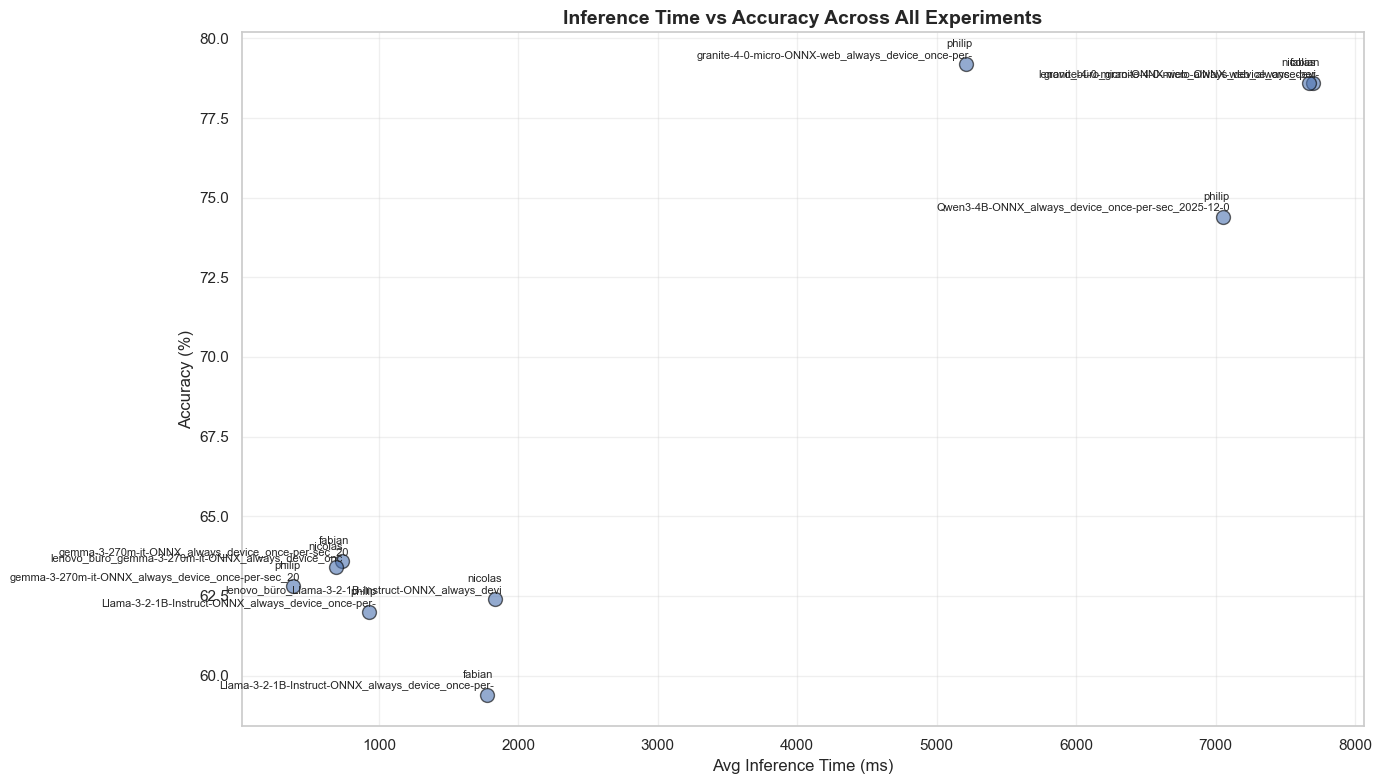

In [10]:
# Call the function with the stats_dfs dictionary
scatterplot_inference_vs_accuracy(stats_dfs)

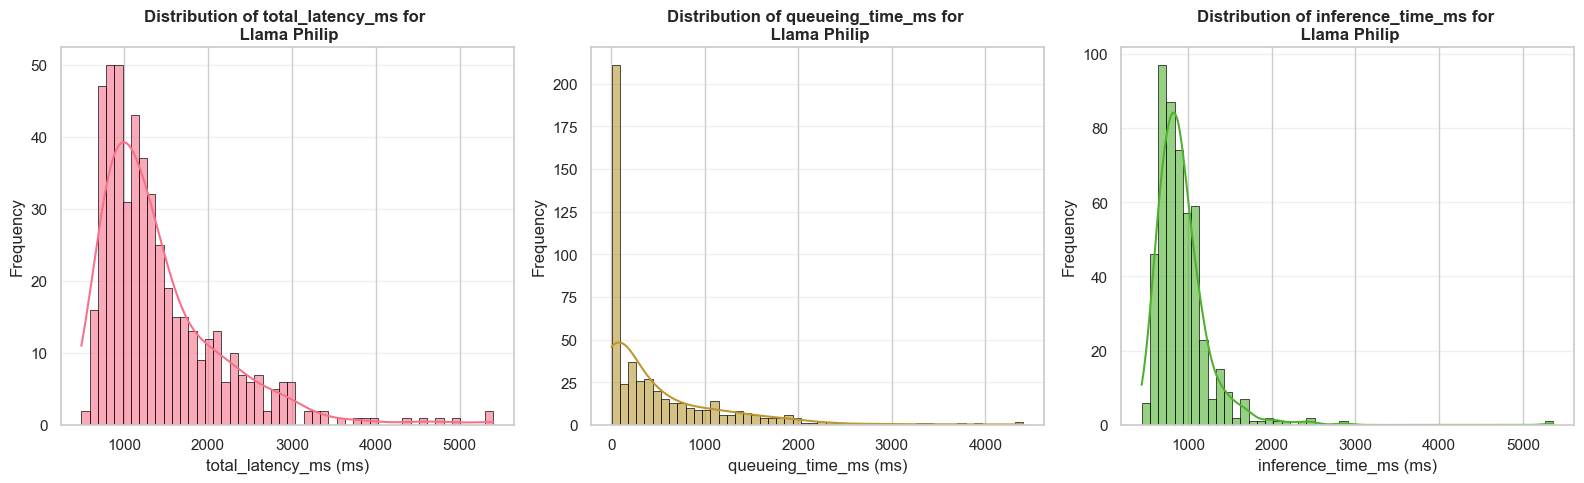

In [11]:
#plot_time_measure_distributions(raw_dfs['fabian/raw_experiment_Llama-3-2-1B-Instruct-ONNX_always_device_once-per-sec_2025-12-03T20-58-00'], 'Llama Fabian')
plot_time_measure_distributions(raw_dfs['philip/raw_experiment_Llama-3-2-1B-Instruct-ONNX_always_device_once-per-sec_2025-12-04T08-10-53'], 'Llama Philip')
#plot_time_measure_distributions(raw_dfs['nicolas/lenovo_büro_raw_experiment_Llama-3-2-1B-Instruct-ONNX_always_device_once-per-sec_2025-12-04T13-03-58'], 'Llama Nicolas Büro')


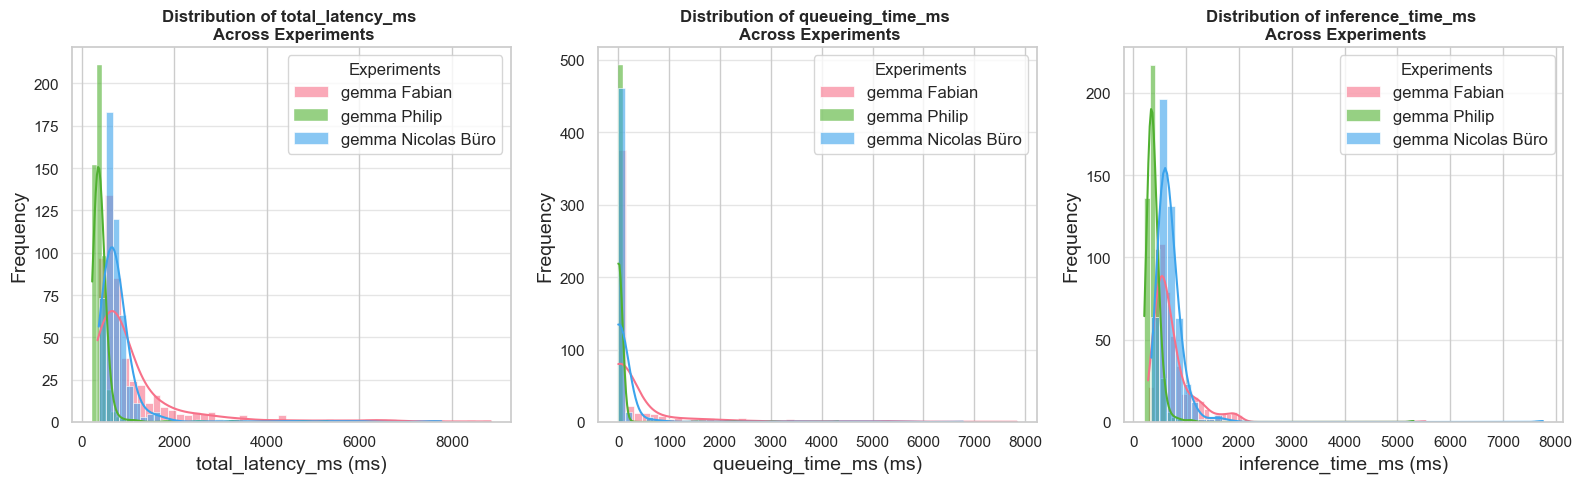

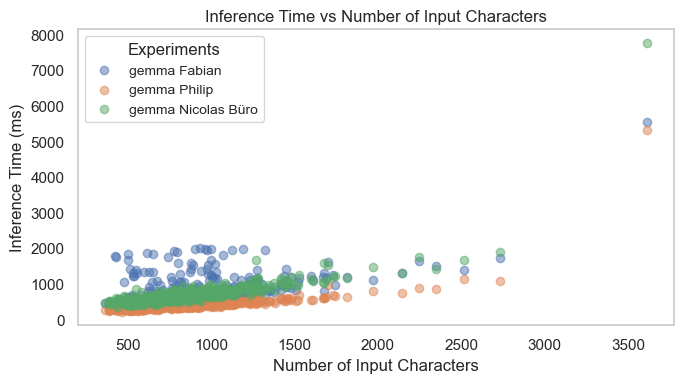

Correlation between number of characters and inference time for gemma Fabian: 0.554725204746592
Correlation between number of characters and inference time for gemma Philip: 0.7049180635731209
Correlation between number of characters and inference time for gemma Nicolas Büro: 0.7526063197711612


In [12]:
# Prepare the data for plotting
experiment_data = [
    raw_dfs['fabian/raw_experiment_gemma-3-270m-it-ONNX_always_device_once-per-sec_2025-12-03T20-41-45'],
    raw_dfs['philip/raw_experiment_gemma-3-270m-it-ONNX_always_device_once-per-sec_2025-12-04T08-01-13'],
    raw_dfs['nicolas/lenovo_büro_raw_experiment_gemma-3-270m-it-ONNX_always_device_once-per-sec_2025-12-04T12-44-34']
]

labels = ['gemma Fabian', 'gemma Philip', 'gemma Nicolas Büro']

# plot time measure distributions
plot_time_measures_overlaid(experiment_data, labels)

# plot inference vs input character amount
plot_characters_vs_inference_time(experiment_data, labels)

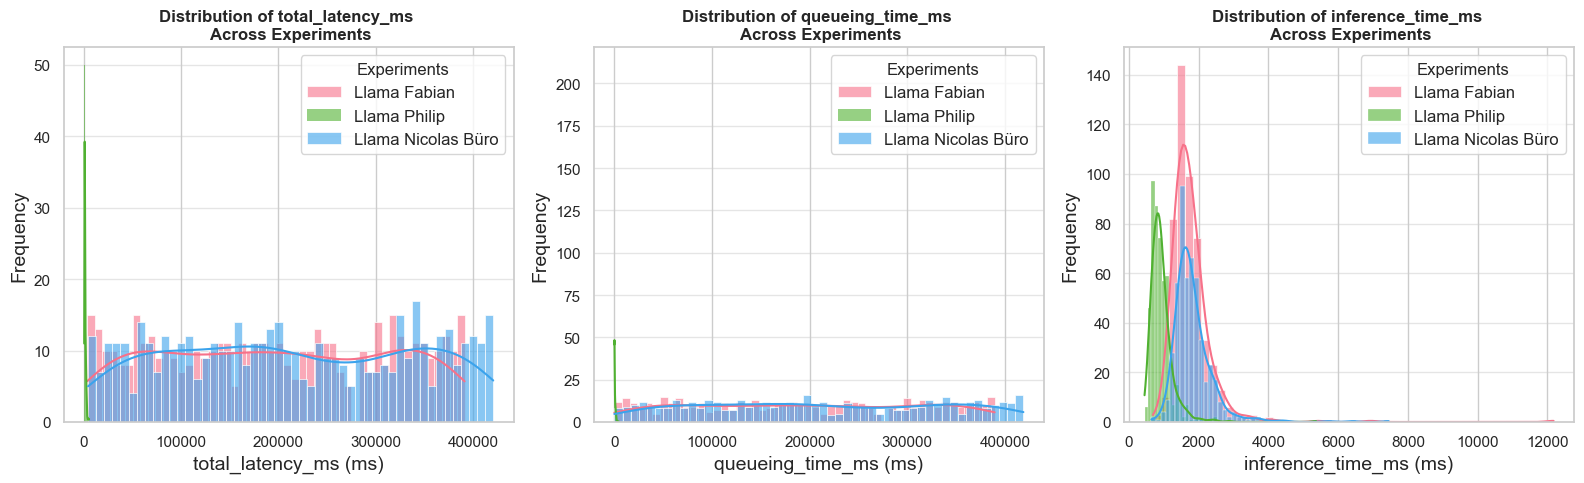

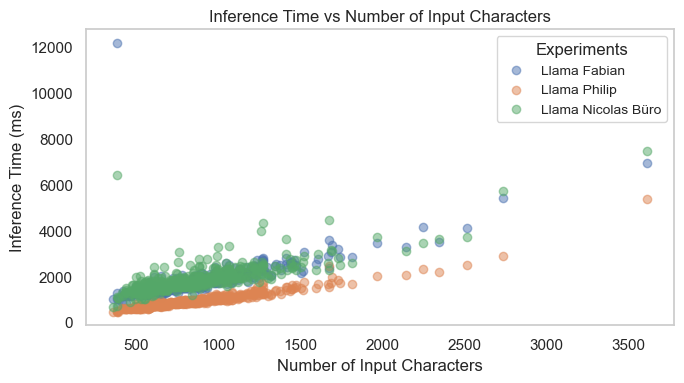

Correlation between number of characters and inference time for Llama Fabian: 0.6595012838309482
Correlation between number of characters and inference time for Llama Philip: 0.9475230235867872
Correlation between number of characters and inference time for Llama Nicolas Büro: 0.7711670339595154


In [13]:
# Prepare the data for plotting
experiment_data = [
    raw_dfs['fabian/raw_experiment_Llama-3-2-1B-Instruct-ONNX_always_device_once-per-sec_2025-12-03T20-58-00'],
    raw_dfs['philip/raw_experiment_Llama-3-2-1B-Instruct-ONNX_always_device_once-per-sec_2025-12-04T08-10-53'],
    raw_dfs['nicolas/lenovo_büro_raw_experiment_Llama-3-2-1B-Instruct-ONNX_always_device_once-per-sec_2025-12-04T13-03-58']
]

labels = ['Llama Fabian', 'Llama Philip', 'Llama Nicolas Büro']

# plot time measure distributions
plot_time_measures_overlaid(experiment_data, labels)

# plot inference vs input character amount
plot_characters_vs_inference_time(experiment_data, labels)

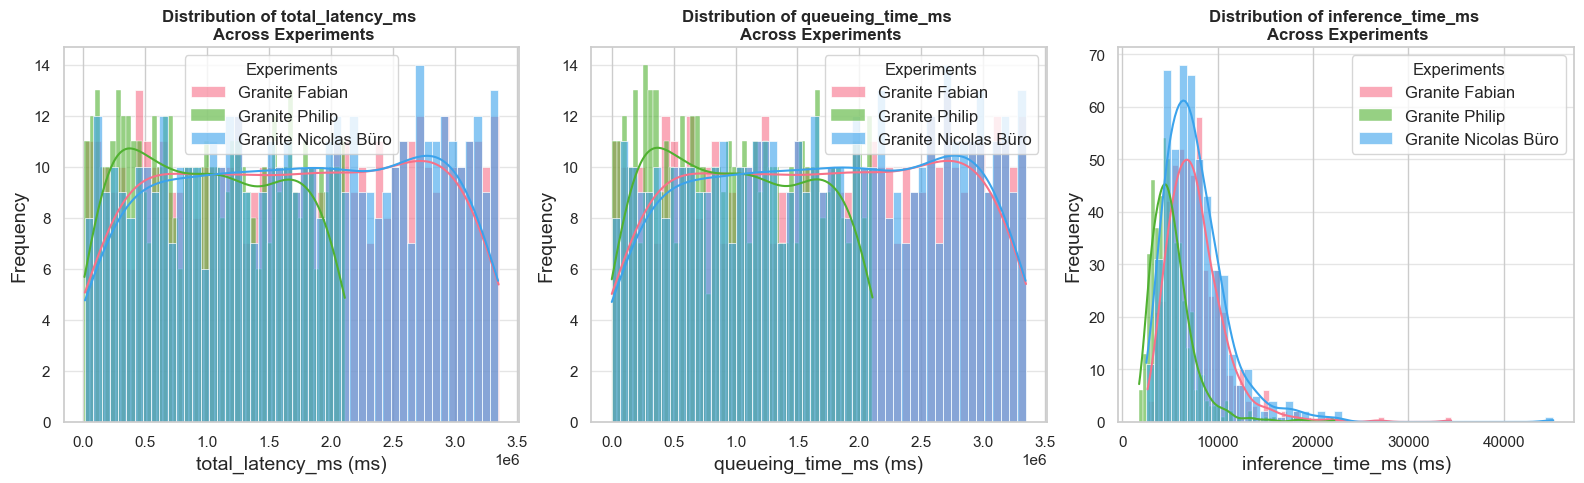

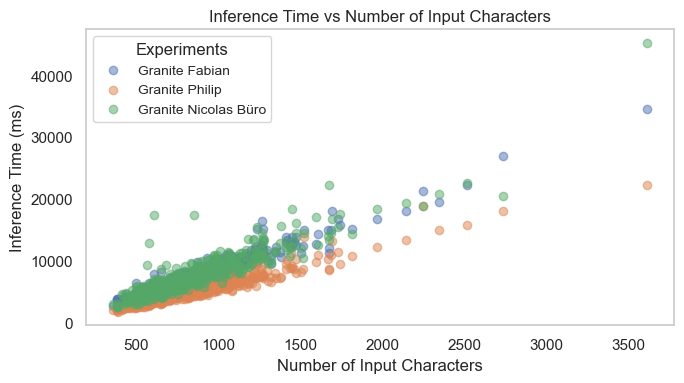

Correlation between number of characters and inference time for Granite Fabian: 0.9656557198442164
Correlation between number of characters and inference time for Granite Philip: 0.9535457786861865
Correlation between number of characters and inference time for Granite Nicolas Büro: 0.9125806954552317


In [16]:
# Prepare the data for plotting
experiment_data_granite = [
    raw_dfs['fabian/raw_experiment_granite-4-0-micro-ONNX-web_always_device_once-per-sec_2025-12-03T22-46-10'],  # Updated key for Fabian
    raw_dfs['philip/raw_experiment_granite-4-0-micro-ONNX-web_always_device_once-per-sec_2025-12-04T09-03-29'],  # Correct key for Philip
    raw_dfs['nicolas/lenovo_büro_raw_experiment_granite-4-0-micro-ONNX-web_always_device_once-per-sec_2025-12-04T12-29-10']  # Correct key for Nicolas
]

labels_granite = ['Granite Fabian', 'Granite Philip', 'Granite Nicolas Büro']

# Plot time measure distributions for Granite experiments
plot_time_measures_overlaid(experiment_data_granite, labels_granite)

# Plot inference vs input character amount for Granite experiments
plot_characters_vs_inference_time(experiment_data_granite, labels_granite)